# Neural Networks

In this notebook, we will create from scratch a toy model for a Neural Network. It will be a fully connected NN, fully specified by the following parameters: dimensions of the intermediate layers, weights in between layers and biases for each neuron. The activation function is always set up to be the sigmoid function. 

In this notebook, we will create the network, evaluate it and train it. 



In [1]:
# First step: load the required libraries

from classicalML_solutions import NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# the library sklearn will be here used for its datasets
# However, it has plenty of automatic models to apply ML 


In [2]:
#load data 
# 

X = load_iris()
X, y = X['data'], X['target']

Y = np.zeros((len(y), 3), dtype=int)
for i, _ in enumerate(y):
    Y[i, _] = 1

p = np.random.permutation(len(X))

X, Y = X[p], Y[p]

X_train, X_test = [x for x in X[:100]], [x for x in X[100:]]
Y_train, Y_test = [y for y in Y[:100]], [y for y in Y[100:]]

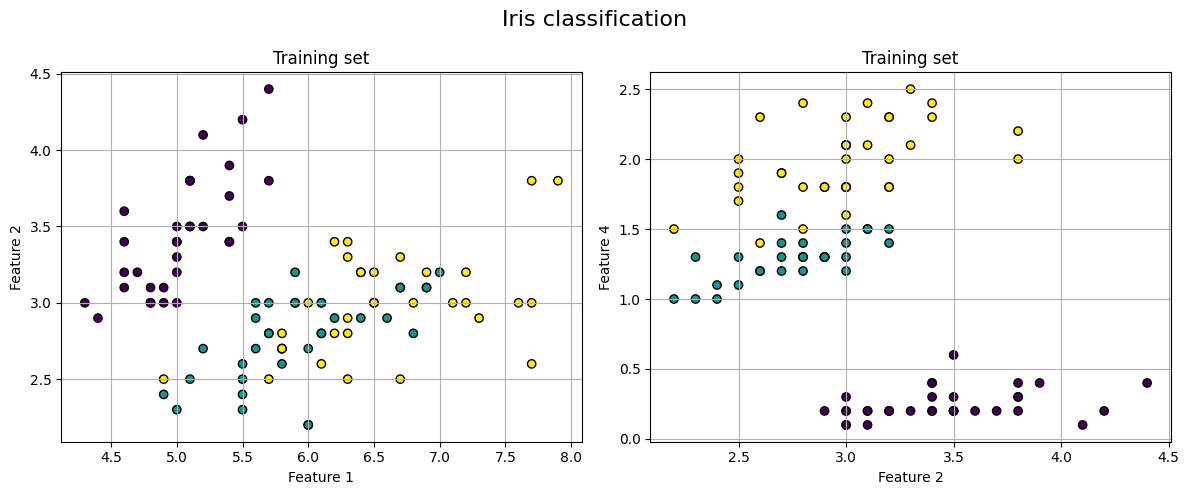

In [7]:
# Visualisation

X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 5))

# True labels
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(Y_train, axis =1), cmap="viridis", edgecolor="k")
plt.title("Training set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 1], X_train[:, 3], c=np.argmax(Y_train, axis =1), cmap="viridis", edgecolor="k")
plt.title("Training set")
plt.xlabel("Feature 2")
plt.ylabel("Feature 4")
#plt.colorbar(label="Class")
plt.grid(True)


# Add overall title and show plot
plt.suptitle('Iris classification', fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# load NN

NN = NeuralNetwork([4,5,6,7,3]) 
# The model is trained here. All the process is automatized in the corresponding library

costs = NN.train_adam(X_train, Y_train, max_it = 1e5) # training process. We use an ADAM optimizer

Y_true, Y_candidate = NN.accuracy(X_train, Y_train)
Y_true_test, Y_candidate_test = NN.accuracy(X_test, Y_test)


We can now check the results

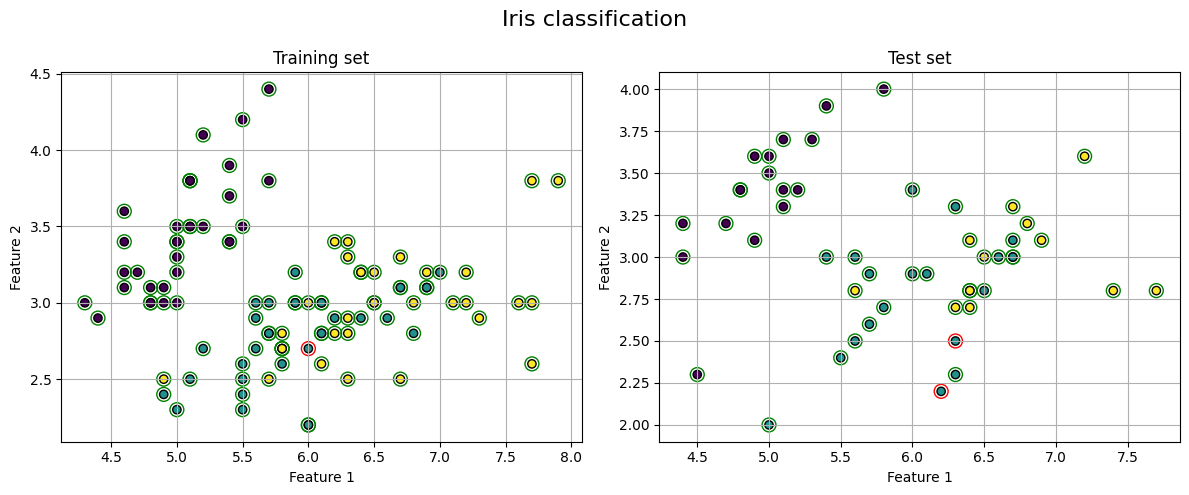

In [8]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 5))

# True labels
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_true, cmap="viridis", edgecolor="k")
correct = Y_true == Y_candidate
incorrect = ~correct
plt.scatter(X_train[correct, 0], X_train[correct, 1], facecolors='none', edgecolors='green', s=100, label="Correct")
plt.scatter(X_train[incorrect, 0], X_train[incorrect, 1], facecolors='none', edgecolors='red', s=100, label="Incorrect")
plt.title("Training set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# Predicted labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_true_test, cmap="viridis", edgecolor="k")
correct = Y_true_test == Y_candidate_test
incorrect = ~correct
plt.scatter(X_test[correct, 0], X_test[correct, 1], facecolors='none', edgecolors='green', s=100, label="Correct")
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], facecolors='none', edgecolors='red', s=100, label="Incorrect")
plt.title("Test set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# Add overall title and show plot
plt.suptitle('Iris classification', fontsize=16)
plt.tight_layout()
plt.show()

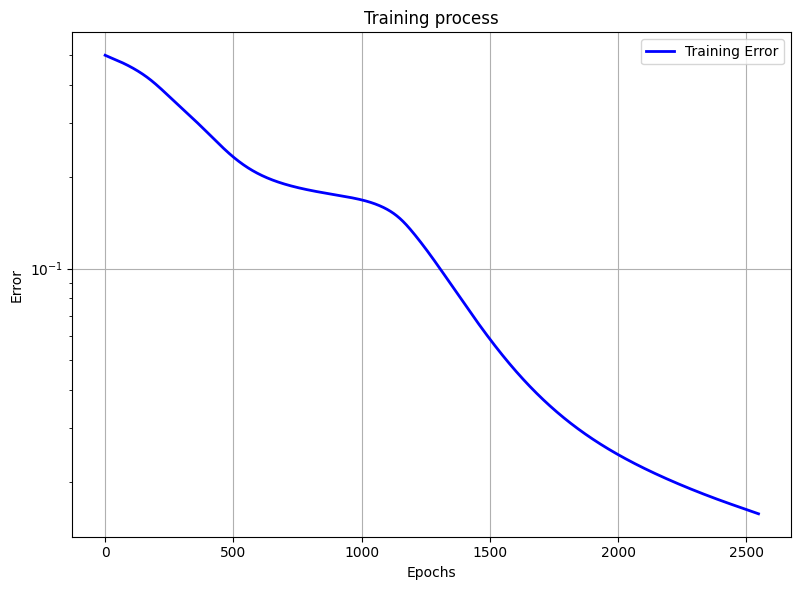

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(costs, label="Training Error", color="blue", linewidth=2)
plt.title("Training process")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.yscale("log")
plt.show()

